In [1]:
import pandas as pd
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [2]:
#in the absence of any data, an expert may still have strong opinions regarding 
#the signatures of the various states of the system. The problem is that S, V0, V1 are observable and that 
#the failure modes F1,F2,F3,F4 are typically not directly observable. The "plotExpertlabels" relates the 
#observables to the unobservables. As S, F1, F2, F3, F4 are dichotomous, 32 system 
#states may be defined in principle. As F2 and F3 are deemed mutually exclusive, 24 system states remain


In [3]:
# load the model inferred from engineering expertise (and not inferred from a data set!)
# the engineering expertise has been captured in a table that defines the possible system states, given some voltages and a switch position
# as this model does not require a history, the blocks below merely "massage" the data to a convenient format.


In [4]:
#load the representation of the engineering expertise in a pandas dataframe

df_dl = None

# this data set represents the system during deployment
#df_dl =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_3VarsDesign.xlsx", index_col=0)
df_dl = pd.read_excel("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Arduino_trainingset_3VarsDesign.xlsx", index_col=0)

In [5]:
# check the datatypes in the dataframe to verify that all voltages are floats]

df_dl = df_dl.astype('float64', errors="ignore") #it appears that that VoltageA2 came in as an integer and that sucks...
df_dl.dtypes

S     float64
V0    float64
V1    float64
F1     object
F2     object
F3     object
F4     object
dtype: object

In [6]:
# dump the datalabels in a dictionary that will be used to map voltages to the system state

dict_dl =  df_dl.groupby(['S','F1','F2','F3','F4']).sum().to_dict('index')

#the keys:   a list of states (S, F1, F2, F3, F4)
#the values: dictionaries of the structure {'V0':v0, 'V1':v1}


In [7]:
# this function defines and plots the "Design" labels

def plotdesignlabels(ax):
    
    dum0 = df_dl.groupby(['F1','F2','F3','F4','S']).mean().reset_index()
    for i in dum0.index:
        cond = (
            df_dl.loc[:,'S']==dum0.loc[i,'S']) & (
            df_dl.loc[:,'F1']==dum0.loc[i,'F1']) & (
            df_dl.loc[:,'F2']==dum0.loc[i,'F2']) & (
            df_dl.loc[:,'F3']==dum0.loc[i,'F3']) & (
            df_dl.loc[:,'F4']==dum0.loc[i,'F4'])
        S = df_dl.loc[cond,'S']
        V0 = df_dl.loc[cond,'V0']
        V1 = df_dl.loc[cond,'V1']
        ax.scatter3D(V0,V1,S, zdir='z', color=str(i/len(dum0.index)), marker='v', 
                     label = 'S='+str(
                         dum0.loc[i,'S'])+',F1='+str(
                         dum0.loc[i,'F1'])+',F2='+str(
                         dum0.loc[i,'F2'])+',F3='+str(
                         dum0.loc[i,'F3'])+',F4='+str(
                         dum0.loc[i,'F4'])+' DL', 
                     s=100*i+50)


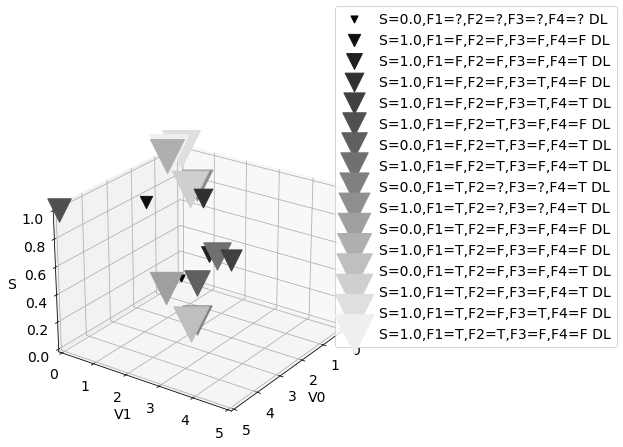

In [8]:
# Dump the plot

fig = plt.figure(figsize = (6,6))
plt.rcParams['font.size']=14
ax = fig.add_subplot(1,1,1, projection='3d')

plotdesignlabels(ax)

ax.set_xlabel('V0'), ax.set_ylabel('V1'),ax.set_zlabel('S')
ax.set_xlim(0,5),    ax.set_ylim(0,5),   ax.set_zlim(0,1)
ax.set_title('')
ax.legend(loc='right', bbox_to_anchor=(1.8, 0.8))
ax.view_init(elev=25, azim=35)#, roll=0)


In [9]:
#the script below will load a labelled dataset and apply RF-classification to it...

In [10]:
#load some data in a pandas dataframe

df = None

# this data set represents the system during deployment

#df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_trainingset_3Vars.xlsx", index_col=0)
df = pd.read_excel("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Arduino_trainingset_3Vars.xlsx", index_col=0)

In [11]:
# check the datatypes in the dataframe to verify that all columns are numerical

df.dtypes

S       int64
V0    float64
V1    float64
F1      int64
F2      int64
F3      int64
F4      int64
dtype: object

In [12]:
# get a preview on the data

#df.head(3)
df.describe()


,S,V0,V1,F1,F2,F3,F4
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.0,251.000000
mean,0.565737,1.854535,0.979364,0.187251,0.123506,0.0,0.219124
std,0.496650,2.059786,1.473071,0.390892,0.329674,0.0,0.414479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.600586,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,3.334961,1.484375,0.000000,0.000000,0.0,0.000000
max,1.000000,4.995117,4.995117,1.000000,1.000000,0.0,1.000000


In [43]:
# this function defines and plots the "training" labels

def plottraininglabels(ax):
    
    dum0 = df.groupby(['F1','F2','F3','F4','S']).mean().reset_index()
    for i in dum0.index:
        cond = (
            df.loc[:,'S']==dum0.loc[i,'S']) & (
            df.loc[:,'F1']==dum0.loc[i,'F1']) & (
            df.loc[:,'F2']==dum0.loc[i,'F2']) & (
            df.loc[:,'F3']==dum0.loc[i,'F3']) & (
            df.loc[:,'F4']==dum0.loc[i,'F4'])
        S = df.loc[cond,'S']
        V0 = df.loc[cond,'V0']
        V1 = df.loc[cond,'V1']
        ax.scatter3D(V0,V1,S, zdir='z', color=str(i/len(dum0.index)), marker='.', 
                     label = 'S='+str(
                         dum0.loc[i,'S'])+',F1='+str(
                         dum0.loc[i,'F1'])+',F2='+str(
                         dum0.loc[i,'F2'])+',F3='+str(
                         dum0.loc[i,'F3'])+',F4='+str(
                         dum0.loc[i,'F4'])+' Training', 
                     s=100*i+50)
    

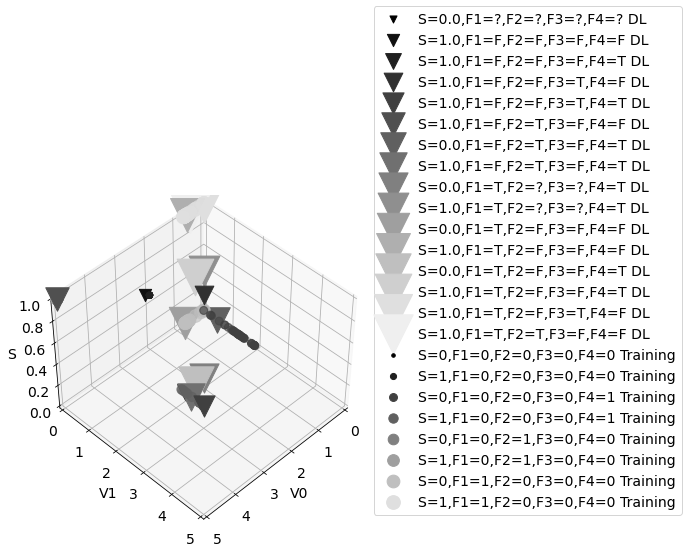

In [48]:
# Dump the plot

fig = plt.figure(figsize = (6,6))
plt.rcParams['font.size']=14
ax = fig.add_subplot(1,1,1, projection='3d')

plotdesignlabels(ax)
plottraininglabels(ax)

ax.set_xlabel('V0'), ax.set_ylabel('V1'),ax.set_zlabel('S')
ax.set_xlim(0,5),    ax.set_ylim(0,5),   ax.set_zlim(0,1)
ax.set_title('')
ax.legend(loc='right', bbox_to_anchor=(2, 0.8))
ax.view_init(elev=45, azim=45)#, roll=0)


In [17]:
# make a dictionary that maps the dummies to T(rue) F(alse) strings

#failure_dict = {}

#failure_dict["F1"] = {0: "F, ", 1:"T, "}
#failure_dict["F2"] = {0: " F, ", 1:" T, "}
#failure_dict["F3"] = {0: " F, ", 1:" T, "}
#failure_dict["F4"] = {0: " F, ", 1:" T, "}


In [18]:
#In the following blocks the random forest model will be inferred using sklearn
#This RF model should predict a fault from voltage readings and the switch position...

#the steps are:
# define the response variables and convert them into an np.array
# define the explanatory variables
# impute data in case of NaN's by using K nearest neighbours
# define and fit the model
# plot the importance of the various explanatory variables using Gini importance

#I deliberately chose not to partition into a training set and a test set as I just validate the models using fresh input from the process

from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.inspection import permutation_importance

In [19]:
# define the response variables and convert them into an np.array
# note that each fault F1,...,F6 is a classifier that should be predicted
    
y_F1 = np.array(df["F1"])
y_F2 = np.array(df["F2"])
y_F3 = np.array(df["F3"])
y_F4 = np.array(df["F4"])


In [20]:
# define the explanatory variables
# note that the voltages and the switch position are the explanatory variables for the faults F1,...,F4

X=df.iloc[:,[0,1,2]]                 #define the explanatory variables
X_names=df.iloc[:,[0,1,2]].columns   #load a string of column names to label the output of the random forest model afterwards...

X_names

Index(['S', 'V0', 'V1'], dtype='object')

In [21]:
# impute data in case of NaN's by using K nearest neighbours
# the imputer also transforms X from a pd.DataFrame to a np.array as required for sklearn

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)

In [22]:
# define and fit the model
# for each fault F1,...F4, a dedicated model has been defined
# not much thought has been spent on the choice of the model parameters

#define the model parameters of each fault F1,...,F4
rf_F1 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F2 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F3 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)
rf_F4 = RandomForestClassifier(n_estimators = 40, criterion="gini",random_state = None)

#fit the models...
rf_F1.fit(X, y_F1)
rf_F2.fit(X, y_F2)
rf_F3.fit(X, y_F3)
rf_F4.fit(X, y_F4)


RandomForestClassifier(n_estimators=40)

In [23]:
# plot the importance of the various explanatory variables using Gini importance
# Gini importance is a number between zero and one, the heigher the Gini importance the better the explanatory variable can predict the failure y 


featureImportances = np.array([rf_F1.feature_importances_, 
                               rf_F2.feature_importances_, 
                               rf_F3.feature_importances_, 
                               rf_F4.feature_importances_])

pd.DataFrame(featureImportances, columns = X_names, index = ["F1","F2","F3","F4"])

,S,V0,V1
F1,0.206639,0.650284,0.143078
F2,0.055524,0.565944,0.378531
F3,0.000000,0.000000,0.000000
F4,0.053405,0.118024,0.828571


In [24]:
#In the following blocks the k-means cluster model will be inferred using sklearn
#This k-means cluster model should detect voltage readings and switch positions that are very far away from the training set

#the steps are:
# define the explanatory variables
# impute data in case of NaN's by using K nearest neighbours
# rescale the data
# define the model and fit it to the data
# present the cluster means

#I deliberately chose not to partition into a training set and a test set as I just validate the models using fresh input from the process

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [25]:
# define the cluster variables
# this step should be identical to the corresponding one in the RF-model

X=df.iloc[:,[0,1,2]]                 #define the explanatory variables
X_names=df.iloc[:,[0,1,2]].columns   #load a string of column names to label the output of the random forest model afterwards...

X_names

Index(['S', 'V0', 'V1'], dtype='object')

In [26]:
# impute data in case of NaN's by using K nearest neighbours
# the imputer also transforms X from a pd.DataFrame to a np.array as required for sklearn
# this step should be identical to the corresponding one in the RF-model

imputer = KNNImputer(n_neighbors=5, weights="distance")
X=imputer.fit_transform(X)

In [27]:
# rescale the data
#the choice of the standard scaler is arbitrary and eventually omissible
#the standard scaler transforms the data to z = (data - mean)/ standard devation
#running on unscaled data will make the voltages much more important than the switch as the voltages range over [0,5] and the switch over (0,1)

#set eventually some parameters of the standardscaler
scaler=StandardScaler()

#transform the data X to Z. Here, X will just be overwritten
X = scaler.fit_transform(X)

#print(scaler.mean_)

In [28]:
# prepare an elbow plot to visually determine a feasible number of clusters
#this step is essentially superfluous as deep knowledge about the number of clusters exists. It is just to show the spread reduction as k increases
#the elbow plot shows that variance within the clusters has indeed become ignorable at k>6

#inertia = []
#K = range(1,8)
#for k in K:
#    kmeanModel = KMeans(n_clusters=k)
#    kmeanModel.fit(X)
#    inertia.append(kmeanModel.inertia_)

In [29]:
#create the elbow plot

#plt.figure(figsize=(16,8))
#plt.plot(K, inertia, 'bx-')
#plt.xlabel('number of clusters k')
#plt.ylabel('Inertia')
#plt.title('Choose the lowest k where the inertia tends to flatten')
#plt.show()

In [30]:
# define the model and fit it to the data

#define the model
k=6            #specify the number of clusters k. Here it is known that 6 system states have been in the data set
kmeanModel = KMeans(n_clusters=k)

#fit the model
kmeanModel.fit(X)
#kmeanModel.predict(X)

KMeans(n_clusters=6)

In [31]:
# present the cluster means and F1,...,F4

#just add a label to the original data
df["clusterlabels"]=kmeanModel.labels_

#group the original data by the assigned clusterlabel and calculate the mean
dfclustermeans=df.groupby("clusterlabels").mean()
dfclustermeans


,S,V0,V1,F1,F2,F3,F4
clusterlabels,,,,,,,
0,1.0,3.333740,1.482829,0.000000,0.000000,0.0,0.000000
1,0.0,0.055357,0.018818,0.168539,0.089888,0.0,0.089888
2,1.0,4.995117,4.753328,0.000000,0.000000,0.0,1.000000
3,1.0,0.336914,0.000000,1.000000,0.000000,0.0,0.000000
4,1.0,4.995117,0.000000,0.000000,1.000000,0.0,0.000000
5,0.0,0.000000,1.341797,0.000000,0.000000,0.0,1.000000


In [32]:
# this function defines and plots the "cluster" labels

def plotclusterlabels(ax):
    
    dum1 = df.iloc[:,[1,2,0,-1]]
    
    for i in list( np.sort(dum1.iloc[:,-1].unique()) ):
        ax.scatter3D(dum1.loc[dum1.iloc[:,-1]==i,'V0'], 
                     dum1.loc[dum1.iloc[:,-1]==i,'V1'], 
                     dum1.loc[dum1.iloc[:,-1]==i,'S'],
                     zdir='z', color=str((i)/len(dum1.iloc[:,-1].unique())),
                     label= 'cluster'+str(i),
                     marker='^', s=20*i+5)
    

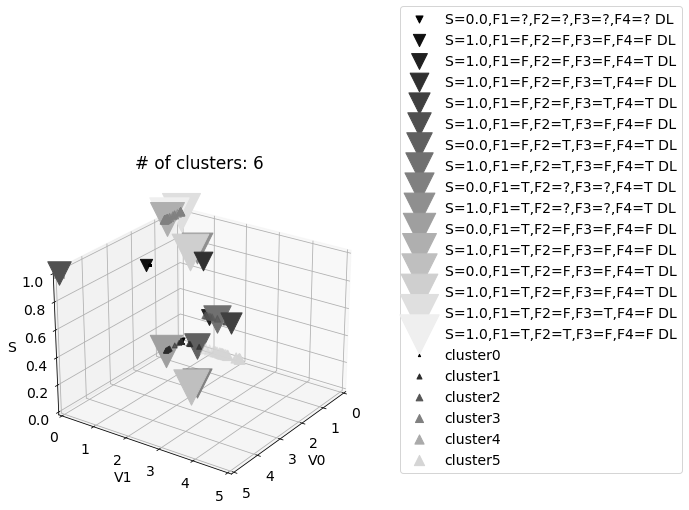

In [33]:
# Plot the training data in a graph AND project the cluster means on them

fig = plt.figure(figsize = (6,6))
plt.rcParams['font.size']=14

# Dump the plot
ax = fig.add_subplot(1,1,1, projection='3d')

plotdesignlabels(ax)
plotclusterlabels(ax)

ax.set_xlabel('V0'), ax.set_ylabel('V1'),ax.set_zlabel('S')
ax.set_xlim(0,5),    ax.set_ylim(0,5),   ax.set_zlim(0,1)
ax.set_title('# of clusters: '+ str(k) )
ax.legend(loc='right', bbox_to_anchor=(2, 0.8))

ax.view_init(elev=25, azim=35)#, roll=0)


In [34]:
#confront the various model with the validation data

In [35]:
# display the RF output

def displayRF(dum5):

    # let the inferred random forest models evaluate the incoming data
    dum_F1 = rf_F1.predict(dum5)
    dum_F2 = rf_F2.predict(dum5)
    dum_F3 = rf_F3.predict(dum5)
    dum_F4 = rf_F4.predict(dum5)
    result = ( dum_F1[0], dum_F2[0], dum_F3[0], dum_F4[0] )
    return result
  

In [36]:
# display DL output

def displayDL(dum5):
    
    dum = {                                                          #generate a dictionary
        k: np.linalg.norm(                                           #determine the difference...
            np.array(dum5) - np.array([                              #between the reading dum5 and...
                    [dum5[0][0]]+list(dict_dl[k].values())           #the values S,V0,V1 in ...
                ])
        )   for k,v in list(dict_dl.items())                         #the various design labels
    }
    result = min(dum, key=dum.get)                                   #get the key where the difference is minimal
    return result
        

In [37]:

df_val = None

# this data set represents the system during deployment
#df_val =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Arduino_validationset_3Vars.xlsx", index_col=0)
df_val = pd.read_excel("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Arduino_validationset_3Vars.xlsx", index_col=0)

In [38]:
# this block will assign an RF label and a D label if the data from df_val is sufficiently close to the training data

uitkomstRF = {}
uitkomstDL = {}
result = ()
afstand = 0.7

for i in df_val.index:
    dummy = df_val.loc[i,:]
    dum5 = np.array([ dummy[:3] ])
        # let the inferred k-means clustering model evaluate the incoming data
    dum6 = scaler.transform(dum5)                   # scaler should be identical to the scaler used during the training of the model!
    dum1 = kmeanModel.predict(dum6)                 # dum1 is the label of the nearest clustermean
    dum2 = kmeanModel.cluster_centers_[dum1]        # dum2 is an array of coordinates of the nearest clustermean
    dum3 = scaler.inverse_transform(dum2)           # reschale the coordinates back, to compare them with the data that came in

# depending on the applicability of the engineering model and the k-means models, different things will be dumped
# both of these models either apply or do not apply and therefore there are 2^2=4 different screen dumps. Applicability means that:
#  the distance between the incoming data and the data from any label in the expert model should be <afstand
#  the distance betwwen the incoming data and the assigned k-means cluster should be <afstand

    if np.linalg.norm(dum5-dum3)<=afstand:
        uitkomstRF[i] = displayRF(dum5)
        
    else:
        uitkomstRF[i] = np.nan
              

    if (min(                                                 #determine the minimum...
        [                                                    #from a list of...
            np.linalg.norm(                                  #differences...
                np.array(dum5) - np.array([                  #between the reading dum5 and...
                    [dum5[0][0]]+list(dict_dl[k].values())   #the values S,V0,V1 in ...
                ])
                )   for k in list(dict_dl.keys())            #dict_dl
            ]
        )
    )<=afstand:
        uitkomstDL[i] = displayDL(dum5)
        
    else:
        uitkomstDL[i] = np.nan

    


In [39]:
# just dump the result in an Excel file for those who want

val_result = pd.concat( [df_val, 
                         pd.DataFrame(uitkomstRF, index=["RF_F1","RF_F2","RF_F3","RF_F4"]).T, 
                         pd.DataFrame(uitkomstDL, index=["SS","DL_F1","DL_F2","DL_F3","DL_F4"]).T.iloc[:,1:]], 
                       axis=1 )

#val_result.to_excel("kanweg.xlsx")

In [40]:
val_result.groupby(['DL_F1','DL_F2','DL_F3','DL_F4'])[['S','V0','V1']].mean().reset_index()

,DL_F1,DL_F2,DL_F3,DL_F4,S,V0,V1
0,?,?,?,?,0.045662,0.013444,0.001003
1,F,F,F,F,1.000000,3.336447,1.480554
2,F,F,F,T,1.000000,4.995117,4.368257
3,F,F,T,F,1.000000,2.358141,2.356343
4,F,T,F,F,1.000000,4.995117,0.000000
5,F,T,F,T,0.000000,0.000000,0.411784
6,T,F,F,F,0.380952,0.651507,0.000000
7,T,T,F,F,0.423077,0.422175,0.000000


In [41]:
val_result.groupby(['RF_F1','RF_F2','RF_F3','RF_F4'])[['S','V0','V1']].mean().reset_index()

,RF_F1,RF_F2,RF_F3,RF_F4,S,V0,V1
0,0.0,0.0,0.0,0.0,0.261364,0.872026,0.386963
1,0.0,0.0,0.0,1.0,0.777778,3.885091,3.564091
2,0.0,1.0,0.0,0.0,1.000000,4.995117,0.000000
3,1.0,0.0,0.0,0.0,0.414286,0.394322,0.000000


In [42]:
val_result.groupby(['F1','F2','F3','F4'])[['S','V0','V1']].mean().reset_index()

,F1,F2,F3,F4,S,V0,V1
0,0,0,0,0,0.385475,1.286116,0.570716
1,0,0,0,1,0.355932,1.777923,1.631025
2,0,0,1,0,0.441860,1.041969,1.041175
3,0,1,0,0,0.500000,2.497559,0.000000
4,1,0,0,0,0.414286,0.394322,0.000000
